# Import data

In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import smogn


data_df = pd.read_csv('../data/2005_2009_curated.csv')
pred_df = pd.read_csv('../data/crash_amounts.csv')

labels = list(data_df)[3:]
print(labels)

X = []
for index, row in pred_df.iterrows():
    relevant_x = data_df.loc[data_df['GISJOIN'] == row["GISJOIN"]]
    X.append(relevant_x[labels].to_numpy().reshape(-1))
    
X = np.array(X)
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)
X = min_max_scaler.transform(X)
T = pred_df[["crash_amount"]].to_numpy()

['bachelors_degree', 'gini_index', 'median_household_income', 'median_age', 'white', 'black', 'native_american', 'asian', 'poverty', 'owned', 'occupied']


In [8]:
data_df

,GISJOIN,county_name,total,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,asian,poverty,owned,occupied
0,G0100010,Autauga County,49584,0.218374,0.410,67931.16,36.0,0.790880,0.178566,0.003892,0.006232,0.103062,0.775481,0.919827
1,G0100030,Baldwin County,171997,0.266273,0.437,64571.76,41.0,0.865126,0.099002,0.005704,0.005698,0.119249,0.774574,0.687410
2,G0100050,Barbour County,29663,0.123642,0.471,42948.84,37.5,0.513906,0.463271,0.004551,0.000910,0.247496,0.665007,0.821627
3,G0100070,Bibb County,21464,0.110912,0.395,54431.52,38.6,0.762766,0.230758,0.000978,0.002376,0.118965,0.786047,0.864346
4,G0100090,Blount County,56804,0.123155,0.414,59935.92,38.2,0.947926,0.009630,0.007711,0.004348,0.109539,0.828427,0.876590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,G7201450,Vega Baja Municipio,64580,0.172592,0.560,22339.68,34.7,0.923723,0.033246,0.001967,0.000557,0.498254,0.848822,0.842238
3217,G7201470,Vieques Municipio,9240,0.137534,0.459,19681.20,39.1,0.674026,0.180736,0.000000,0.002056,0.474438,0.817881,0.720248
3218,G7201490,Villalba Municipio,30054,0.148541,0.491,19748.52,30.8,0.690191,0.018700,0.002030,0.000000,0.571395,0.782882,0.885901
3219,G7201510,Yabucoa Municipio,40463,0.132540,0.464,21551.64,34.2,0.570521,0.079258,0.001112,0.001631,0.519637,0.769790,0.856377


In [13]:
pred_df.sort_values(by='crash_amount', ascending=False)

,Unnamed: 0,county,GISJOIN,highest_price,lowest_price,crash_amount
229,229,Merced County,G0600470,373376.0,111317.0,0.701864
14,14,Wayne County,G2601630,157238.0,48176.0,0.693611
118,118,Stanislaus County,G0600990,425152.0,140078.0,0.670523
228,228,Clayton County,G1300630,130244.0,45161.0,0.653258
80,80,San Joaquin County,G0600770,460671.0,162641.0,0.646948
...,...,...,...,...,...,...
343,343,Ouachita Parish,G2200730,123592.0,119586.0,0.032413
661,661,Holmes County,G3900750,138185.0,133889.0,0.031089
671,671,Tioga County,G4201170,108619.0,105557.0,0.028190
871,871,Saunders County,G3101550,148062.0,145762.0,0.015534


In [10]:
X.shape, T.shape

((1066, 11), (1066, 1))

In [15]:
X_train, X_test, T_train, T_test = train_test_split(X,T,test_size=0.25)
X_train.shape, X_test.shape, T_train.shape, T_test.shape

((799, 11), (267, 11), (799, 1), (267, 1))

# Correlations

In [17]:
corr_thing = pd.DataFrame(list(np.hstack((T.reshape(-1,1),X))), columns=["target",*labels])
corr_thing.corr()

,target,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,asian,poverty,owned,occupied
target,1.000000,0.102033,0.011995,0.204317,-0.050589,-0.211397,0.064692,0.020948,0.216522,-0.104923,-0.069584,-0.030849
bachelors_degree,0.102033,1.000000,0.122554,0.765688,-0.192640,-0.015036,-0.129906,-0.090011,0.499943,-0.560311,-0.213299,0.259046
gini_index,0.011995,0.122554,1.000000,-0.339850,-0.048695,-0.399567,0.387136,-0.006722,0.068336,0.524108,-0.500854,-0.176396
median_household_income,0.204317,0.765688,-0.339850,1.000000,-0.106038,0.119860,-0.275016,-0.105108,0.487920,-0.823738,0.157731,0.366485
median_age,-0.050589,-0.192640,-0.048695,-0.106038,1.000000,0.363078,-0.213022,-0.037575,-0.229219,-0.154721,0.518069,-0.435612
white,-0.211397,-0.015036,-0.399567,0.119860,0.363078,1.000000,-0.866700,-0.113131,-0.312414,-0.416659,0.533854,-0.026406
black,0.064692,-0.129906,0.387136,-0.275016,-0.213022,-0.866700,1.000000,-0.123173,-0.047877,0.476322,-0.363955,-0.045915
native_american,0.020948,-0.090011,-0.006722,-0.105108,-0.037575,-0.113131,-0.123173,1.000000,-0.027763,0.119649,-0.009947,-0.120978
asian,0.216522,0.499943,0.068336,0.487920,-0.229219,-0.312414,-0.047877,-0.027763,1.000000,-0.264372,-0.339130,0.236704
poverty,-0.104923,-0.560311,0.524108,-0.823738,-0.154721,-0.416659,0.476322,0.119649,-0.264372,1.000000,-0.361877,-0.264666


# Linear Regression

In [19]:
linreg = LinearRegression()
linreg.fit(X_train,T_train)
# linreg.score(X_train,T_train)

LinearRegression()

In [20]:
Y_train = linreg.predict(X_train)
rmse_train = np.sqrt(np.mean((Y_train-T_train)**2))
print(f"Train RMSE: {rmse_train}")

Y_test = linreg.predict(X_test)
rmse_test = np.sqrt(np.mean((Y_test-T_test)**2))
print(f"Test RMSE: {rmse_test}")

Train RMSE: 0.11432939337968083
Test RMSE: 0.10915161130517828


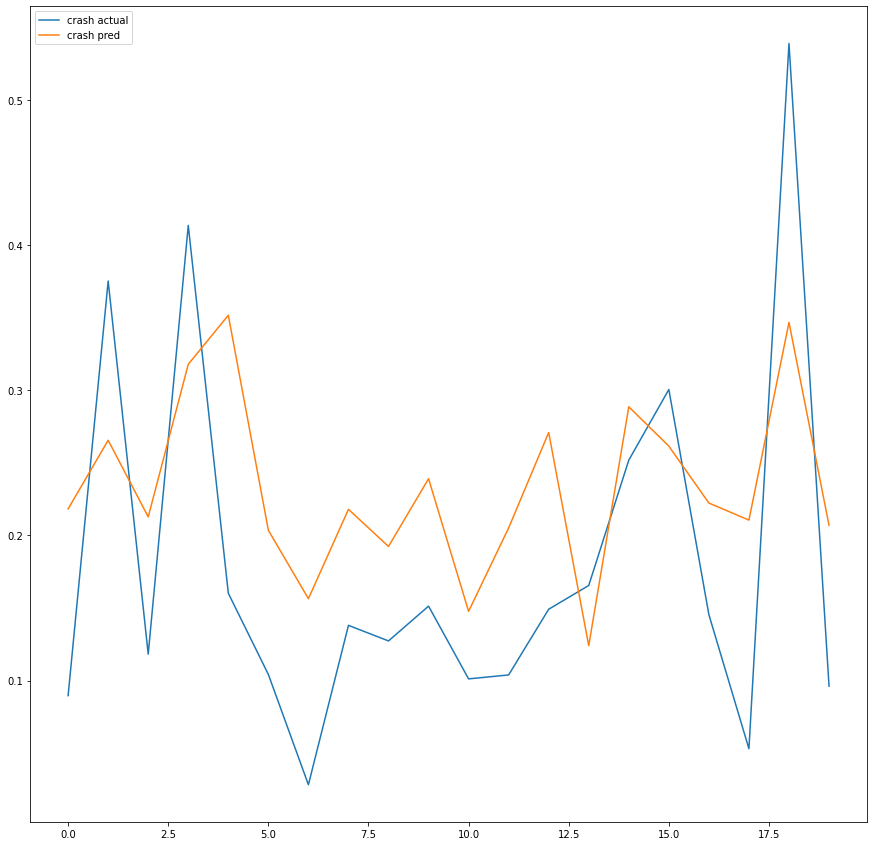

In [25]:
plt.figure(figsize=(15,15))
plt.plot(T_test[:20], label="crash actual")
plt.plot(Y_test[:20], label="crash pred")
plt.legend()

Its really bad at extreme values.

In [26]:
pd.DataFrame(linreg.coef_, columns=labels)

,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,asian,poverty,owned,occupied
0,-0.26795,0.120437,0.376734,0.05042,-0.632794,-0.504609,-0.33929,-0.295921,-0.08478,-0.048747,-0.123792


In [27]:
linreg.intercept_

array([0.8482886])

It appears that the data must be nonlinear.

# Deep Learning

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
model = keras.Sequential(
    [
        keras.Input(shape=(11,)),
        layers.Dense(64, activation="relu", name="layer1"),
        layers.Dense(256, activation="relu", name="layer2"),
        layers.Dense(64, activation="relu", name="layer3"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                768       
                                                                 
 layer2 (Dense)              (None, 256)               16640     
                                                                 
 layer3 (Dense)              (None, 64)                16448     
                                                                 
 out (Dense)                 (None, 1)                 65        
                                                                 
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________


In [38]:
n_epochs = 50
history1 = model.fit(X_train, T_train, batch_size=16, epochs=n_epochs, verbose=1, validation_data=(X_test,T_test))

Epoch 1/50
50/50 [==============================] - 1s 5ms/step - loss: 0.0184 - val_loss: 0.0130
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0133
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.0121
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0152
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.0109
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.0103
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.0104
Epoch 8/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.0110
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0121
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0111
Epoch 11/50
50/50 [

In [39]:
Y_train = model.predict(X_train)
Y_test = model.predict(X_test)

In [40]:
Y_train = linreg.predict(X_train)
rmse_train = np.sqrt(np.mean((Y_train-T_train)**2))
print(f"Train RMSE: {rmse_train}")

Y_test = linreg.predict(X_test)
rmse_test = np.sqrt(np.mean((Y_test-T_test)**2))
print(f"Test RMSE: {rmse_test}")

Train RMSE: 0.11432939337968083
Test RMSE: 0.10915161130517828


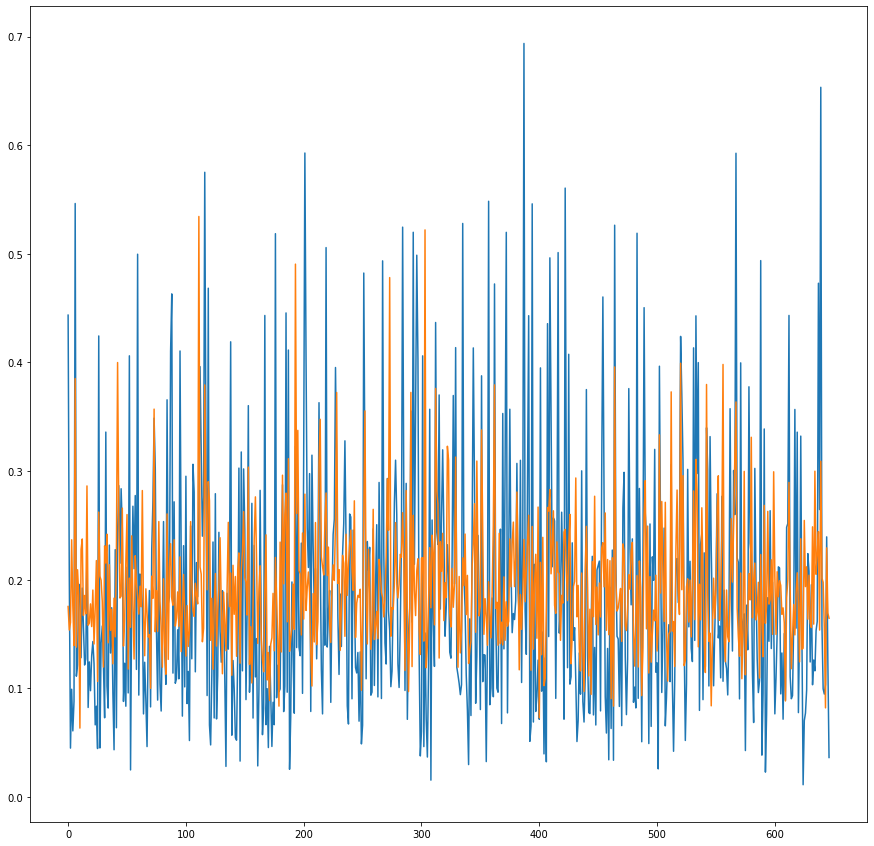

In [16]:
plt.figure(figsize=(15,15))
plt.plot(T_test)
plt.plot(Y_test);

In [18]:
Y_test.mean()

0.3314611687189681